In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.stats import pearsonr, spearmanr
import pingouin as pg
import tqdm
plt.style.use('Solarize_Light2') # Функция для задания стиля графикам

In [2]:
sheet_name = '2-1'
# sheet_name = '1вар-адекв'
data = pd.read_excel('data2.xlsx', sheet_name=sheet_name, 
                     header=None, names=['1', '2', '3', '4', '5']) # читаем из файла все выборки 
data# выводим их

,1,2,3,4,5
0,13.576533,8.444634,42.737,7.574,2.369
1,9.988142,13.552947,23.261,1.660,6.072
2,8.190783,14.466266,13.439,-5.422,3.504
3,8.412009,10.531638,15.174,-5.483,4.532
4,10.021344,8.826599,24.573,3.247,7.447
5,6.843471,7.619135,13.896,-5.045,7.473
6,12.588240,9.044741,31.656,4.941,3.230
7,5.860016,6.764138,9.851,-9.953,6.228
8,11.176900,10.191905,29.845,0.698,1.476
9,12.874558,10.269014,36.838,-1.033,-4.573


In [3]:
length = len(data.T)

In [4]:
def get_correlation(df, corr_function):
    names = df.columns
    correlation = np.zeros((length, length))
    correlation[range(length), range(length)] = 1
    p_values = np.zeros((length, length))
    p_values[range(length), range(length)] = 1

    for i in range(len(names)):
        for j in range(i + 1, len(names)):
            res = spearmanr(data[names[i]], data[names[j]])
            correlation[i, j] = correlation[j, i] = res[0]
            p_values[i, j] = p_values[j, i] = res[1]
    df_correlation = pd.DataFrame(correlation)
    df_p_values = pd.DataFrame(p_values)
    df_correlation.columns = df_p_values.columns = names
    df_correlation.index = df_p_values.index = names
    
    return df_correlation, df_p_values

In [5]:
corr, p_vals = get_correlation(data, pearsonr)

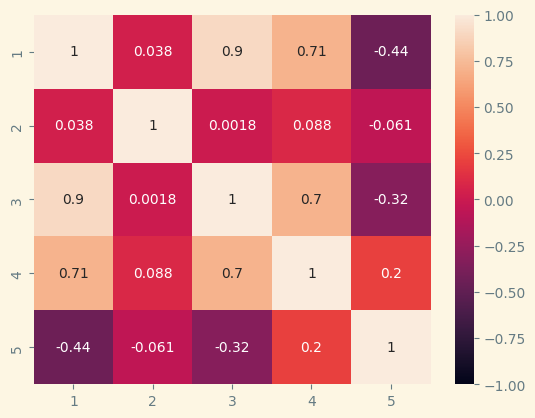

In [6]:
sns.heatmap(corr, annot=True, vmin=-1, vmax=1);

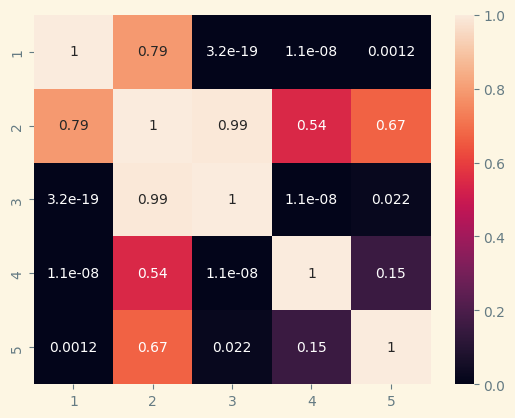

In [7]:
sns.heatmap(p_vals, annot=True, vmin=0, vmax=1);

In [8]:
partial_corr = pg.partial_corr(data=data, x='1', y='2', covar='3')

print(partial_corr)

          n         r          CI95%     p-val
pearson  50  0.196611  [-0.09, 0.45]  0.175735


In [10]:
corr, p_vals = get_correlation(data, spearmanr)

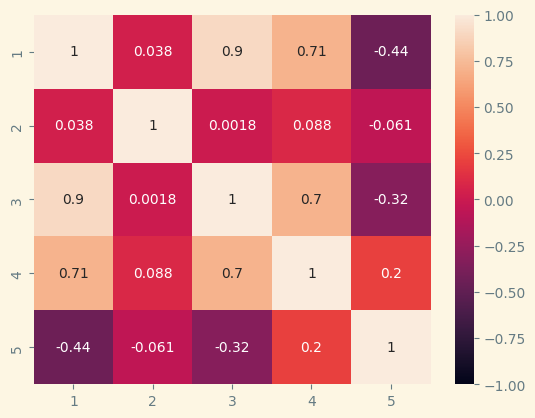

In [11]:
sns.heatmap(corr, annot=True, vmin=-1, vmax=1);

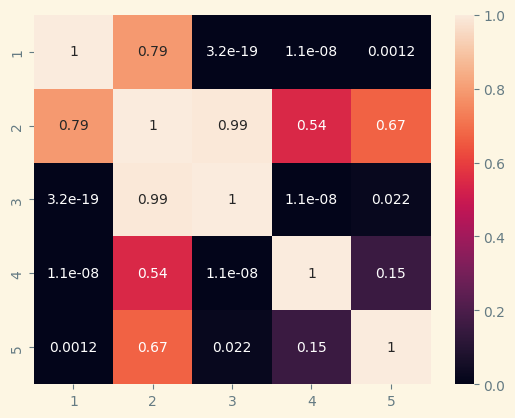

In [12]:
sns.heatmap(p_vals, annot=True, vmin=0, vmax=1);

In [14]:
pg.partial_corr(data=data, x='1', y='2', covar='3', method='pearson')

,n,r,CI95%,p-val
pearson,50,0.196611,"[-0.09, 0.45]",0.175735
